In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../../modules')

In [2]:
import numpy as np
import common_plots
import plotly.graph_objects as go

# Non-Parametric Models
There are many non-parametric models you can use, such as k-means and k-nearest-neighbour.
### Kernel Density Estimation
With Kernel Density Estimation the probability is assumed to by based on the kernel distance between the sample point and every other point. The format is:
$$p(x)=\frac{1}{n}\sum_{i=1}^n \Phi(x-y_i)$$
where $y$ is the data and $\Phi$ is a function which integrates to 1. <br>
**Example:** <br>
setting $\Phi$ to a zero mean spherical Gaussian.
Making a pair of sloped lines to test. Several different values $\sigma$ used.

In [7]:
def zero_mean_spherical_kernel_2d(x,sigma):
    norm = 1/(2*np.pi*sigma**2)
    exponent = np.exp(-0.5*np.sum(x**2,axis=1)/(sigma**2))
    return norm*exponent

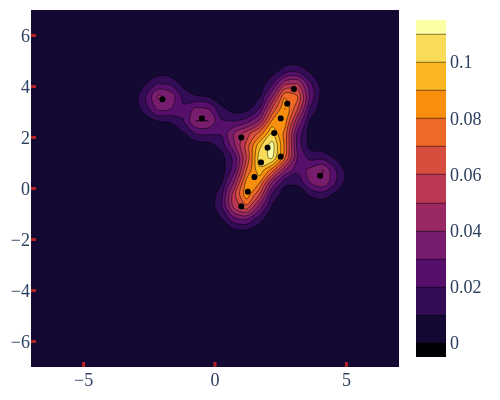

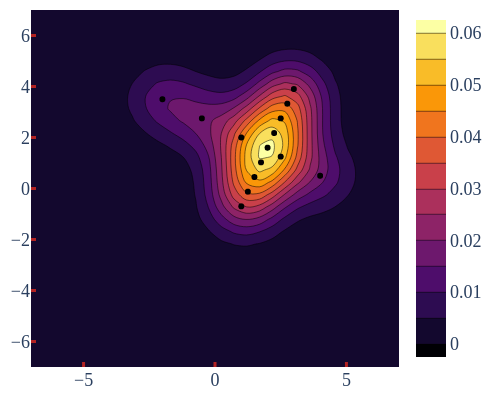

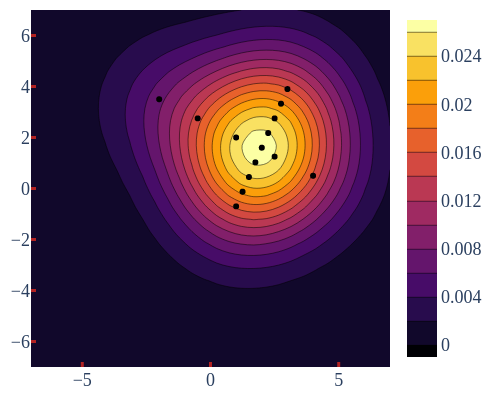

In [8]:
# Truth. Two lines
true_data_X1 = np.linspace(-2,4,5)
true_data_Y1 = true_data_X1*-0.5+2.5
true_data_X2 = np.linspace(1,3,9)
true_data_Y2 = true_data_X2*2.3-3
true_data_X = np.concatenate([true_data_X1,true_data_X2])
true_data_Y = np.concatenate([true_data_Y1,true_data_Y2])
true_data = np.concatenate([true_data_X.reshape(-1,1),true_data_Y.reshape(-1,1)],axis=1)
# Grid of values
X = np.linspace(-7,7,30)
Y = np.linspace(-7,7,30)
gridX = np.repeat(X,len(Y)).reshape(-1,1)
gridY = np.tile(Y,len(X)).reshape(-1,1)
grid = np.concatenate([gridX,gridY],axis=1)
# find probability, looping through different sigmas
for sigma in [0.5,1,2]:
    total_probability = np.zeros(grid.shape[0])
    for i in range(true_data.shape[0]):
        difference = grid-true_data[i]
        total_probability+=zero_mean_spherical_kernel_2d(difference,sigma)
    normalized_probability = total_probability/true_data.shape[0]
    # plot (True data in black)
    probability_grid = normalized_probability.reshape(len(X),len(Y),order="F")
    fig = common_plots.plot_simple_contour(X,Y,probability_grid,"Inferno")
    fig.add_trace(go.Scatter(x=true_data_X, y=true_data_Y, mode='markers',marker=dict(color="black")))
    fig.show(renderer="png",width=500,height=400)